In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load fused feature dataset
df = pd.read_csv('../results/fused_features.csv')
df.head()

Visualize Feature Distributions (histograms / KDE plots)

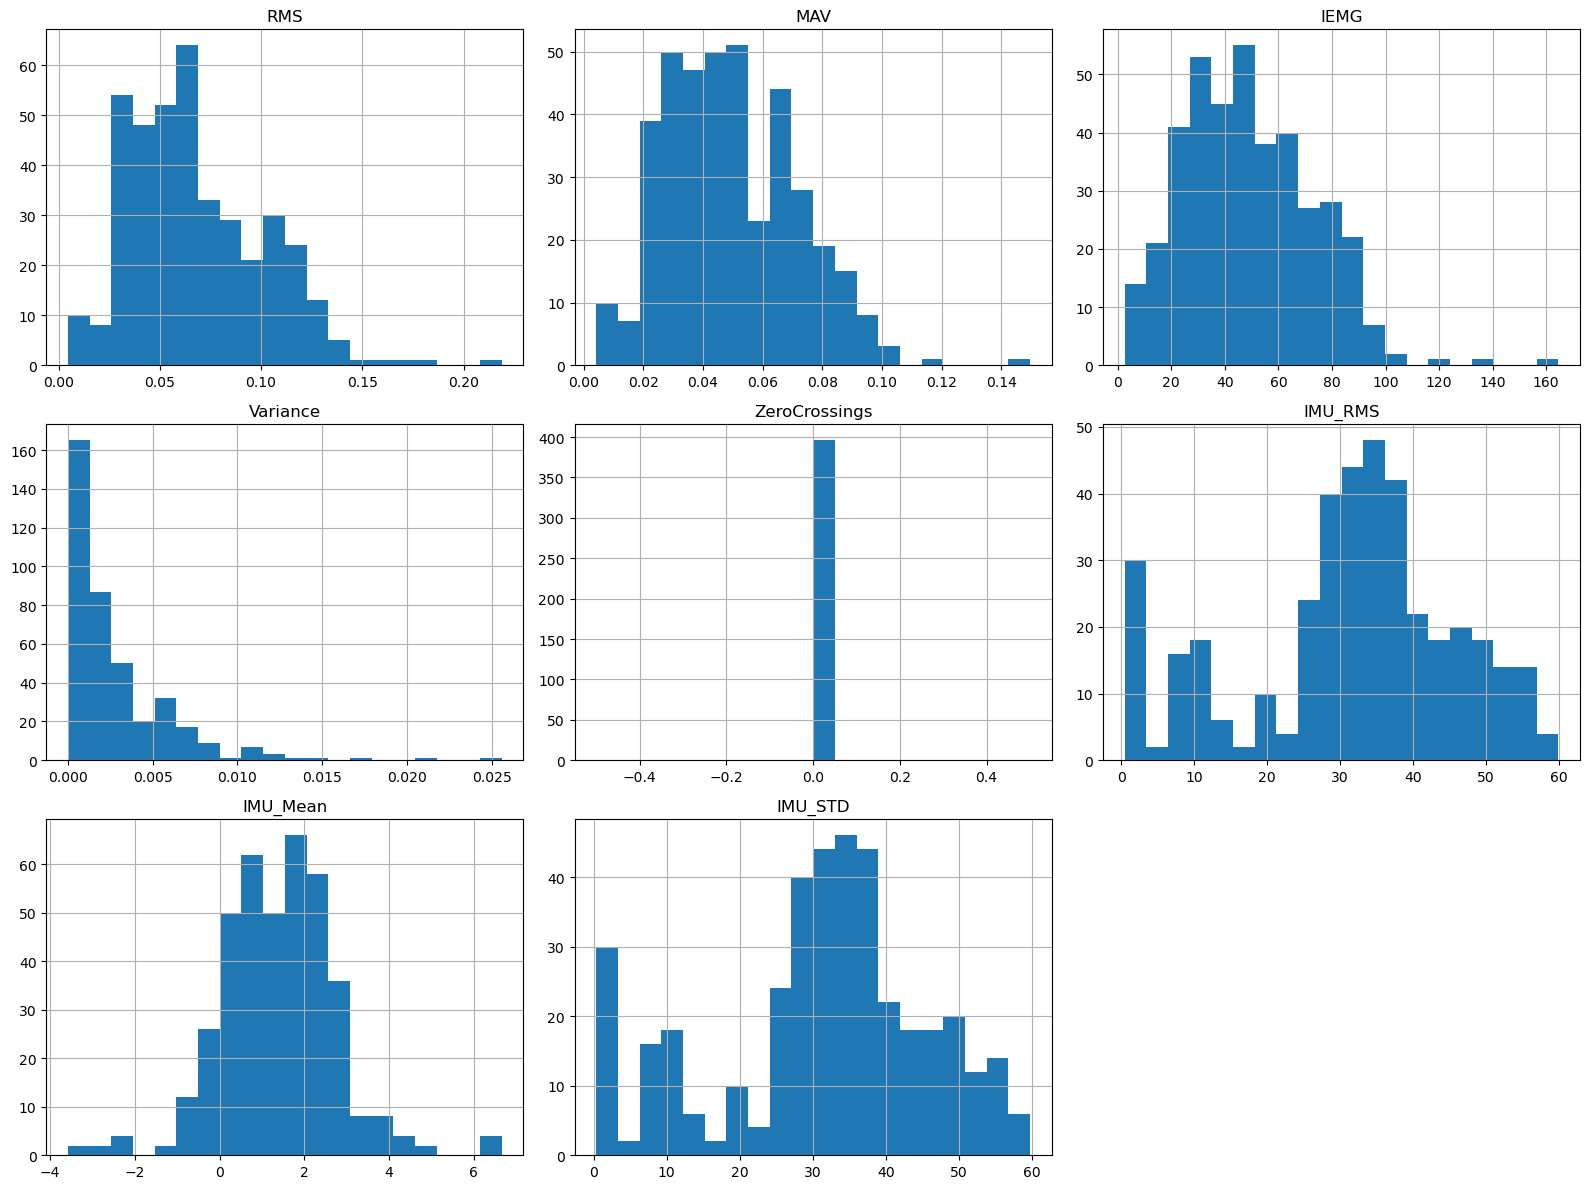

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


# Load fused feature dataset
df = pd.read_csv('C:/Users/s233183/Special-Course-Parkinson-Machine-Learning/GaitProject_NRT/results/fused_features.csv')
df.head()
# Select numeric feature columns only (excluding time, subject, group)
feature_cols = [col for col in df.columns if col not in ['Start', 'End', 'Subject', 'Group', 'Muscle']]

# Distribution plots for all features
df[feature_cols].hist(figsize=(16, 12), bins=20)
plt.tight_layout()
plt.show()

Feature Correlation Matrix

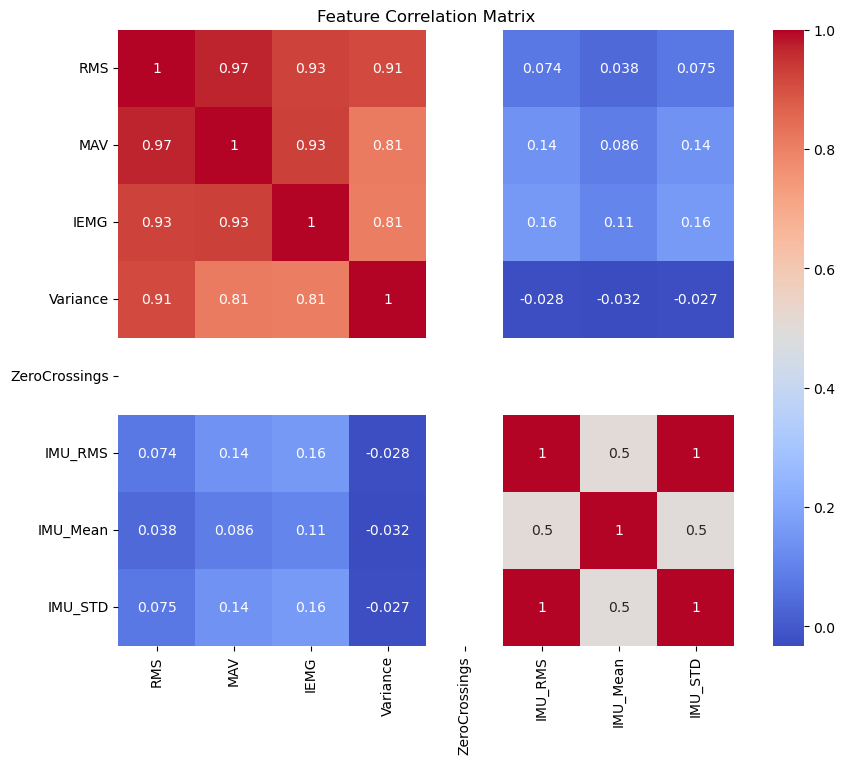

In [3]:
corr = df[feature_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', square=True)
plt.title('Feature Correlation Matrix')
plt.show()

PCA for Visualizing Data Clusters

3.1 Standardize features first:


3.2 Run PCA

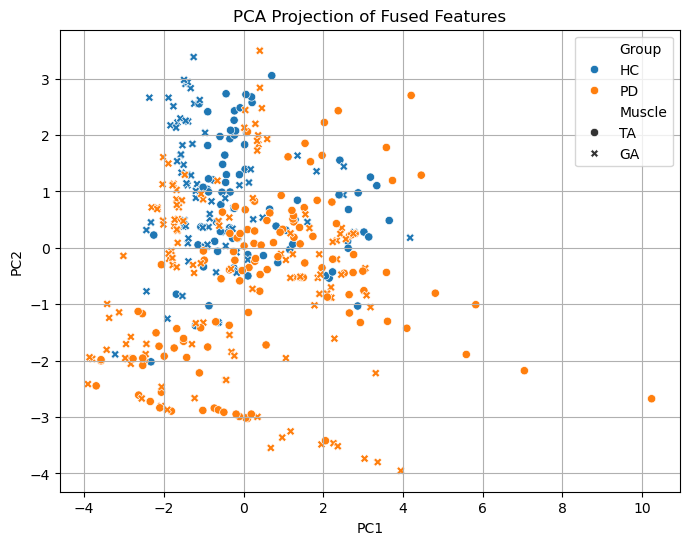

Explained variance by PC1 and PC2: [0.53401688 0.3336471 ]


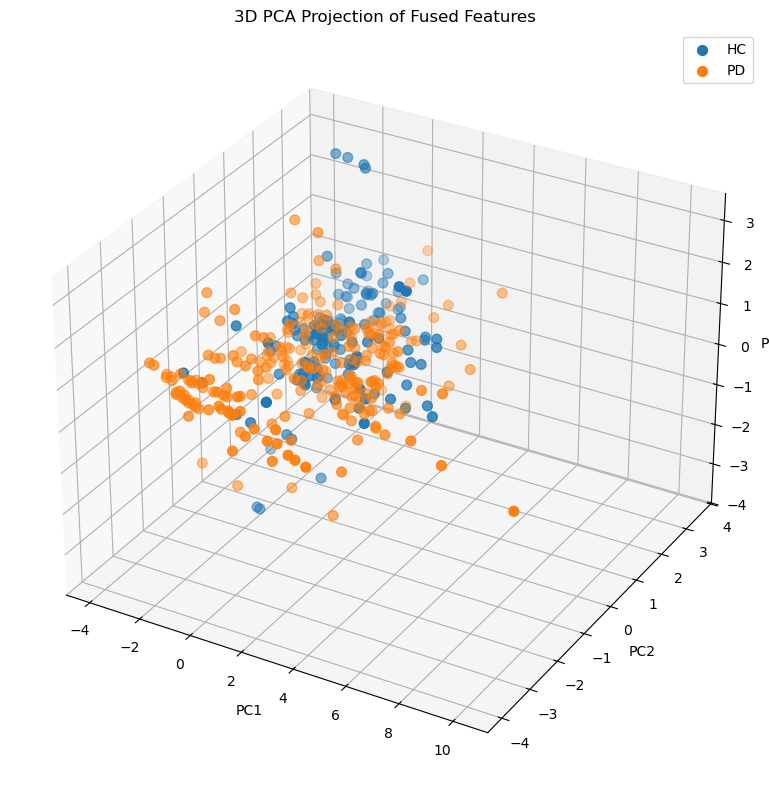

Explained variance by PC1, PC2, PC3: [0.53401688 0.3336471  0.09077029]


In [9]:
from mpl_toolkits.mplot3d import Axes3D  # 3D plotting
from matplotlib import cm

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[feature_cols])
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Add PCA result to dataframe
df['PC1'] = X_pca[:, 0]
df['PC2'] = X_pca[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Group', data=df, style='Muscle')
plt.title('PCA Projection of Fused Features')
plt.grid(True)
plt.show()

print("Explained variance by PC1 and PC2:", pca.explained_variance_ratio_)

# Fit PCA with 3 components
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_scaled)

# Add to dataframe
df['PC1'] = X_pca_3d[:, 0]
df['PC2'] = X_pca_3d[:, 1]
df['PC3'] = X_pca_3d[:, 2]

# 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

groups = df['Group'].unique()
colors = cm.tab10.colors

for i, group in enumerate(groups):
    subset = df[df['Group'] == group]
    ax.scatter(subset['PC1'], subset['PC2'], subset['PC3'], 
               label=group, s=50, color=colors[i])

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('3D PCA Projection of Fused Features')
ax.legend()
plt.tight_layout()
plt.show()

# Show explained variance ratios
print("Explained variance by PC1, PC2, PC3:", pca_3d.explained_variance_ratio_)

3.3 Scatter plot of PC1 vs PC2 colored by group

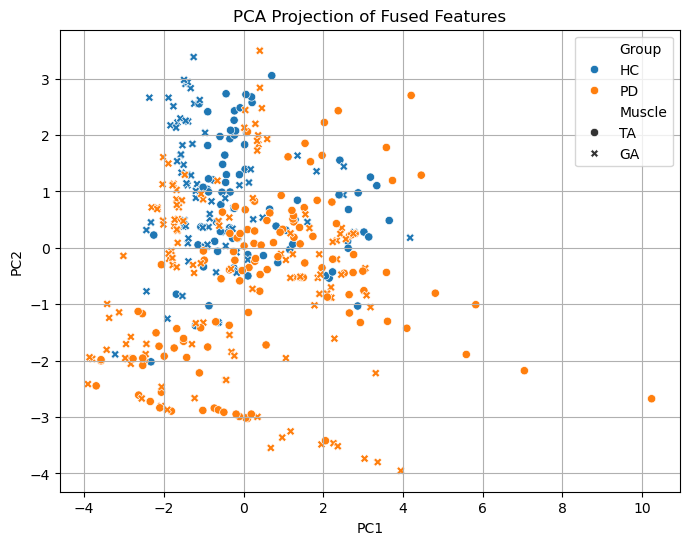

In [10]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Group', data=df, style='Muscle')
plt.title('PCA Projection of Fused Features')
plt.grid(True)
plt.show()

3.4 Check explained variance ratio

In [11]:
print("Explained variance by PC1 and PC2:", pca.explained_variance_ratio_)

Explained variance by PC1 and PC2: [0.53401688 0.3336471 ]


Interactive 3D PCA Scatter Plot